### Download and unzip dataset

In [ ]:
!wget https://neovision-public.s3.eu-west-3.amazonaws.com/data_ia/public_data.zip

--2021-02-02 16:05:59--  https://neovision-public.s3.eu-west-3.amazonaws.com/data_ia/public_data.zip
Resolving neovision-public.s3.eu-west-3.amazonaws.com (neovision-public.s3.eu-west-3.amazonaws.com)... 52.95.156.20
Connecting to neovision-public.s3.eu-west-3.amazonaws.com (neovision-public.s3.eu-west-3.amazonaws.com)|52.95.156.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62451887 (60M) [application/zip]
Saving to: ‘public_data.zip’

public_data.zip     100%[===================>]  59.56M  16.5MB/s    in 3.6s    

2021-02-02 16:06:03 (16.5 MB/s) - ‘public_data.zip’ saved [62451887/62451887]



In [ ]:
!mkdir data

In [ ]:
!unzip -q public_data.zip -d ./data

### Read the .csv annotation file 

In [ ]:
import pandas as pd

In [ ]:
DATA_DIR = './data/'

In [ ]:
train_df = pd.read_csv(f'{DATA_DIR}train.csv')
train_df

,index,image,mask,char
0,0,train/00000.image.jpg,train/00000.mask.jpg,7
1,1,train/00001.image.jpg,train/00001.mask.jpg,y
2,2,train/00002.image.jpg,train/00002.mask.jpg,w
3,3,train/00003.image.jpg,train/00003.mask.jpg,j
4,4,train/00004.image.jpg,train/00004.mask.jpg,l
...,...,...,...,...
6995,6995,train/06995.image.jpg,train/06995.mask.jpg,u
6996,6996,train/06996.image.jpg,train/06996.mask.jpg,z
6997,6997,train/06997.image.jpg,train/06997.mask.jpg,c
6998,6998,train/06998.image.jpg,train/06998.mask.jpg,h


In [ ]:
test_df = pd.read_csv(f'{DATA_DIR}test.csv')
test_df

,index,image
0,7000,test/07000.image.jpg
1,7001,test/07001.image.jpg
2,7002,test/07002.image.jpg
3,7003,test/07003.image.jpg
4,7004,test/07004.image.jpg
...,...,...
2995,9995,test/09995.image.jpg
2996,9996,test/09996.image.jpg
2997,9997,test/09997.image.jpg
2998,9998,test/09998.image.jpg


### Show a random sample

Let's start by loading a random image as a numpy array using the pillow library (PIL) and display it using matplotlib.

In [ ]:
from PIL import Image
from random import randint
from matplotlib import pyplot as plt

In [ ]:
def get_random_sample(file):        
    n_rows = file.shape[0]
    rindx  = randint(0, n_rows)
    sample = file.loc[rindx]    
    indx   = sample['index']
    img    = Image.open(DATA_DIR + sample['image'])
    
    if 'mask' in file.columns:
        mask = Image.open(DATA_DIR + sample['mask'])
        char = sample['char']
    else: 
        mask, char = None, '?'
    
    return {'index': indx,'image': img, 'mask': mask, 'char': char}

In [ ]:
def plot_sample(sample):
    plt.figure(figsize=(7, 7))
    plt.subplot(121)
    
    plt.title(f"Image: {sample['char']}")
    plt.axis('off')
    plt.imshow(sample['image'])
    
    if sample['mask']:
        plt.subplot(122)
        plt.title('Mask')
        plt.axis('off')
        plt.imshow(sample['mask'])

Each training sample is composed of an image, a mask and the true character.

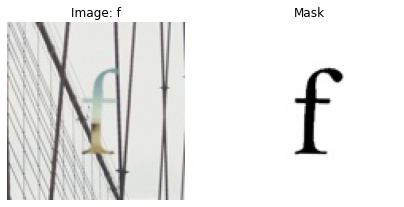

In [ ]:
sample = get_random_sample(train_df)
plot_sample(sample)

For test samples, you only have access to the image.

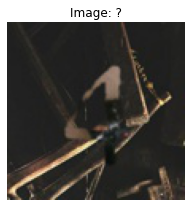

In [ ]:
sample = get_random_sample(test_df)
plot_sample(sample)

### A first (random) model

Let's start with a really simple "model": for each image, we sample a random character as our prediction.



In [ ]:
from random import choice

In [ ]:
def predict(sample):
    # Random prediction
    classes = '0123456789abcdefghijklmnopqrstuvwxyz'
    return choice(classes)

predict(sample)

'b'

### Evaluate this model on the training set

Even if we don't have much hopes for this super simple model, let's evaluate it on the training set. For now, we don't split our training set into training and validation, but you might want to do this in the future.

We start by looping over the training set to predict the character for each image.

In [ ]:
train_predictions = []
for sample in train_df.itertuples():
    result = predict(sample)
    train_predictions.append({'index':sample.index, 'pred':result})

In [ ]:
train_predictions_df = pd.DataFrame.from_records(train_predictions)

We then implement the score function for the challenge, the accuracy macro-averaged over the characters.

In [ ]:
def macro_accuracy(groundtruth, predictions):
    aligned = groundtruth.merge(predictions, how='left', on='index')
    aligned['comparison'] = (aligned.char == aligned.pred)

    macro_accuracy = aligned.groupby('char').comparison.mean().values.mean()

    return macro_accuracy

In [ ]:
score = macro_accuracy(train_df, train_predictions_df)

print('Accuracy (macro-average): ', score)

Accuracy (macro-average):  0.0271633278731671


### Submit your results on the test set

Now that we evaluated the model on the training set, we can prepare a submission on the test set. First, we loop over the test set to predict the characters of each image and create a predictions DataFrame.

In [ ]:
test_predictions = []
for sample in test_df.itertuples():
    result = predict(sample)
    test_predictions.append({'index':sample.index, 'pred':result})

In [ ]:
test_predictions_df = pd.DataFrame.from_records(test_predictions)

Export the dataframe to a csv file named "test_predictions.csv" and zip it to prepare for submission through CodaLab interface.

In [ ]:
test_predictions_df.to_csv('test_predictions.csv', index=False)

In [ ]:
!head test_predictions.csv

index,pred
7000,w
7001,k
7002,8
7003,8
7004,q
7005,s
7006,q
7007,y
7008,0


In [ ]:
!zip submission.zip test_predictions.csv

  adding: test_predictions.csv (deflated 57%)


Now you can upload this zip file through the CodaLab interface to submit your first results and get some feedback.